In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import re

In [ ]:
data = [
    "I love this product",
    "Amazing and fantastic experience",
    "Highly recommended",
    "This made me very happy",
    "Great quality and performance",
    "I enjoyed using this",
    "Very satisfying and useful",
    "This works perfectly",
    "Absolutely wonderful",

    "I hate this item",
    "Terrible and disappointing",
    "Worst experience ever",
    "Not worth buying",
    "Very bad quality",
    "Completely useless",
    "It broke in one day",
    "Made me very upset",
    "Total waste of money",
]

labels = [
    1,1,1,1,1,1,1,1,1,
    0,0,0,0,0,0,0,0,0
]

In [ ]:
def clean_text(s):
    s = s.lower()
    s = re.sub(r"[^a-z0-9\s']", " ", s)
    s = re.sub(r"\s+", " ", s).strip()
    return s

df["clean"] = df["text"].apply(clean_text)

In [ ]:
vectorizer = CountVectorizer(stop_words="english")
X = vectorizer.fit_transform(df["clean"])
features = np.array(vectorizer.get_feature_names_out())

clf = MultinomialNB()
clf.fit(X, df["label"])

MultinomialNB()

In [ ]:
classes = clf.classes_
neg_class = classes[0]   # False
pos_class = classes[1]   # True

neg_idx = list(classes).index(neg_class)
pos_idx = list(classes).index(pos_class)

In [ ]:
log_prob_neg = clf.feature_log_prob_[neg_idx]
log_prob_pos = clf.feature_log_prob_[pos_idx]

In [ ]:
log_odds = log_prob_pos - log_prob_neg

In [ ]:
TOP_N = 10
top_pos_idx = np.argsort(log_odds)[-TOP_N:][::-1]
top_neg_idx = np.argsort(log_odds)[:TOP_N]

top_pos_words = features[top_pos_idx]
top_neg_words = features[top_neg_idx]

top_pos_scores = log_odds[top_pos_idx]
top_neg_scores = log_odds[top_neg_idx]

In [ ]:
print("\nTOP POSITIVE WORDS:")
for w, s in zip(top_pos_words, top_pos_scores):
    print(f"{w:20s}  {s:.4f}")

print("\nTOP NEGATIVE WORDS:")
for w, s in zip(top_neg_words, top_neg_scores):
    print(f"{w:20s}  {s:.4f}")


TOP POSITIVE WORDS:
recommended           0.6325
love                  0.6325
product               0.6325
amazing               0.6325
fantastic             0.6325
highly                0.6325
worst                 -0.7538
terrible              -0.7538
hate                  -0.7538
experience            -0.7538

TOP NEGATIVE WORDS:
disappointing         -0.7538
experience            -0.7538
hate                  -0.7538
terrible              -0.7538
worst                 -0.7538
highly                0.6325
fantastic             0.6325
amazing               0.6325
product               0.6325
love                  0.6325


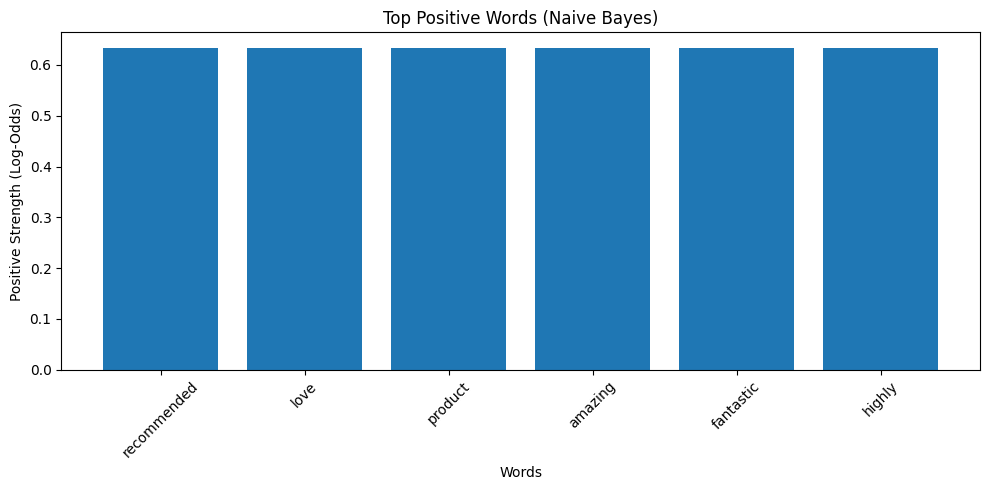

In [ ]:
pos_filtered_words = []
pos_filtered_scores = []

for w, s in zip(top_pos_words, top_pos_scores):
    if s > 0:
        pos_filtered_words.append(w)
        pos_filtered_scores.append(s)

plt.figure(figsize=(10,5))
plt.bar(pos_filtered_words, pos_filtered_scores)
plt.title("Top Positive Words (Naive Bayes)")
plt.xlabel("Words")
plt.ylabel("Positive Strength (Log-Odds)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


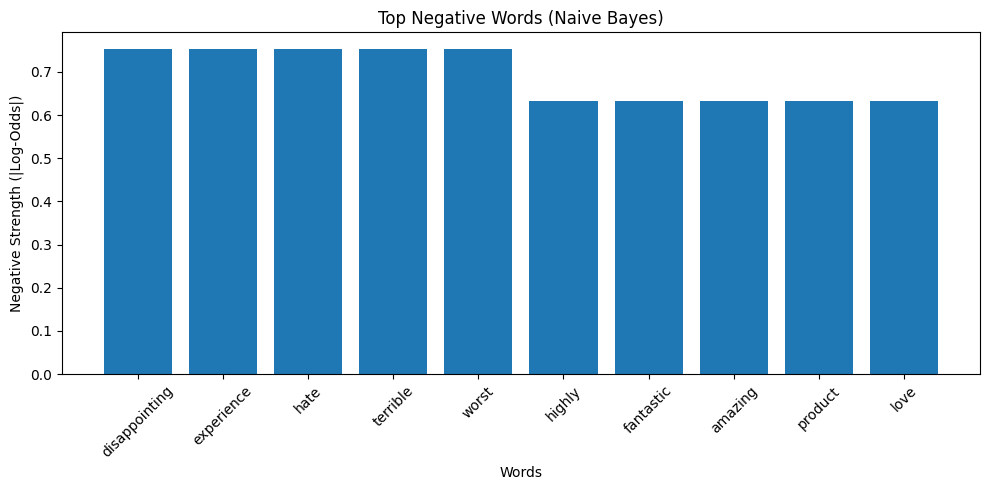

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(top_neg_words, neg_magnitude)
plt.title("Top Negative Words (Naive Bayes)")
plt.xlabel("Words")
plt.ylabel("Negative Strength (|Log-Odds|)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()